In [1]:
from init_nb import init_notebook
config = init_notebook()

from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import numpy as np
import seaborn as sns
from nilearn import plotting
import nibabel as nib
import itertools
from bold_dementia.connectivity import (
    Atlas, group_by_networks, plot_matrix, reshape_pvalues, block_block, plot_ordered_matrix, pivot_resdf, z_transform_to_vec
)
from bold_dementia.utils.iterables import unique
import networkx as nx
from bold_dementia.visualisation.chord_plot import create_chord, make_links
from bold_dementia import get_config
from bold_dementia.stats.prepare_individuals import make_fc_data

ATLAS = "msdl"
SOFT = True
ALPHA = config["alpha"]
atlas = Atlas.from_name(ATLAS, soft=SOFT)

In [2]:
expname = f"atlas-{ATLAS}_merged"
maps_path = Path(
    f"{config['output_dir']}/connectivity/{expname}"
)
maps_spec = get_config(maps_path / "parameters.yml")
model_spec = get_config("../LM_specs/OLS_cenanom_block.yml")

In [3]:
import sys
sys.argv.insert(1, maps_path)
sys.argv

['/homes_unix/jlegrand/miniconda3/envs/memento/lib/python3.11/site-packages/ipykernel_launcher.py',
 PosixPath('/homes_unix/jlegrand/data/Memento/output/connectivity/atlas-msdl_merged'),
 '--f=/homes_unix/jlegrand/.local/share/jupyter/runtime/kernel-v2-251923Xsr6zZXScJ5o.json']

In [4]:
df, edges, model_spec = make_fc_data(maps_path, maps_spec, model_spec)

BY_BLOCK is True, grouping regions into networks...
New labels : ['Ant IPS', 'Aud', 'Basal', 'Cereb', 'Cing-Ins', 'D Att', 'DMN', 'Dors PCC', 'L V Att', 'Language', 'Motor', 'Occ post', 'R V Att', 'Salience', 'Striate', 'Temporal', 'Vis Sec']
edge  Ant IPS_Ant IPS  Ant IPS_Aud   Aud_Aud  Ant IPS_Basal  Aud_Basal  \
0            0.626175     0.104530  0.728500       0.039902   0.011098   
1            0.785643     0.065971  0.721059      -0.018434  -0.258680   
2            0.843599     0.496140  0.843320      -0.144742  -0.027651   
3            0.821355     0.522215  0.819115      -0.117178  -0.025646   
4            0.842851     0.469720  0.785488      -0.141608  -0.047030   

edge  Basal_Basal  Ant IPS_Cereb  Aud_Cereb  Basal_Cereb  Cereb_Cereb  ...  \
0           0.996       0.113217  -0.131465     0.157836        0.996  ...   
1           0.996       0.023453  -0.242363     0.440274        0.996  ...   
2           0.996      -0.260660  -0.261941    -0.210231        0.996  ...   


In [5]:
df[edges]

,Ant IPS_Ant IPS,Ant IPS_Aud,Aud_Aud,Ant IPS_Basal,Aud_Basal,Basal_Basal,Ant IPS_Cereb,Aud_Cereb,Basal_Cereb,Cereb_Cereb,...,Dors PCC_Vis Sec,L V Att_Vis Sec,Language_Vis Sec,Motor_Vis Sec,Occ post_Vis Sec,R V Att_Vis Sec,Salience_Vis Sec,Striate_Vis Sec,Temporal_Vis Sec,Vis Sec_Vis Sec
0,0.786032,0.318939,0.856525,-0.145100,0.009696,0.996000,-0.069693,-0.004998,-0.260222,0.996000,...,-0.009018,-0.271220,0.006305,0.043805,-0.015943,-0.315105,-0.165397,0.390676,0.204912,0.658954
1,0.792601,0.255853,0.828535,0.147587,0.192229,0.996000,0.253987,0.119405,0.097575,0.996000,...,0.250362,-0.116033,0.120721,0.176018,0.070462,0.005208,-0.016413,0.378249,0.148934,0.722935
2,0.805193,0.330579,0.831136,-0.329708,-0.121750,0.996000,-0.341180,-0.291882,0.313561,0.996000,...,-0.070476,0.019326,0.292814,0.082694,0.386577,-0.042506,0.132124,0.611629,0.437285,0.794591
3,0.844639,0.062047,0.914972,0.095966,0.029983,0.996000,0.074930,-0.034716,0.397578,0.996000,...,0.142195,-0.213232,-0.238985,-0.170397,0.427566,-0.132797,-0.079509,0.345060,-0.233621,0.817837
4,0.833342,0.452774,0.845348,-0.225956,-0.124161,0.996000,-0.488660,-0.464398,0.153172,0.996000,...,-0.084479,-0.247909,-0.049947,-0.216848,0.225372,-0.165382,-0.213090,0.509896,0.088833,0.756125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.667959,-0.031217,0.738079,-0.023069,0.110636,0.996000,-0.010489,-0.046527,0.053950,0.996000,...,-0.045968,-0.071827,0.023201,0.170419,0.095321,-0.129030,0.011016,0.235451,0.074354,0.458944
1308,0.864844,0.522065,0.921196,-0.020172,-0.195063,0.996000,-0.412339,-0.505340,-0.124680,0.996000,...,0.248943,-0.243161,-0.319544,-0.448575,0.647213,-0.205536,-0.246723,0.186270,-0.464487,0.875150
1309,0.841255,-0.147084,0.759305,0.005594,-0.014901,0.995984,0.089728,-0.183699,0.367262,0.995984,...,0.064394,-0.121231,-0.057162,0.187671,-0.237515,-0.226805,-0.055300,0.125668,0.075025,0.651184
1310,0.734461,0.431768,0.813693,-0.086331,-0.317845,0.996000,-0.204272,-0.079773,0.021945,0.996000,...,0.025744,-0.242753,-0.057749,0.190456,0.094733,-0.164464,-0.080252,0.269774,0.154328,0.660371


In [6]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

cvalues = df[edges].values
reducer = make_pipeline(
    #preprocessing.StandardScaler(),
    #preprocessing.Normalizer(),
    PCA(n_components=2)
)
embedding = reducer.fit_transform(cvalues)


In [33]:
intra_region = df[edges].iloc[:, ::10].melt(var_name="edge", value_name="Fisher transformed connectivity")

In [34]:
intra_region

,edge,Fisher transformed connectivity
0,Ant IPS_Ant IPS,0.786032
1,Ant IPS_Ant IPS,0.792601
2,Ant IPS_Ant IPS,0.805193
3,Ant IPS_Ant IPS,0.844639
4,Ant IPS_Ant IPS,0.833342
...,...,...
20987,Striate_Vis Sec,0.235451
20988,Striate_Vis Sec,0.186270
20989,Striate_Vis Sec,0.125668
20990,Striate_Vis Sec,0.269774


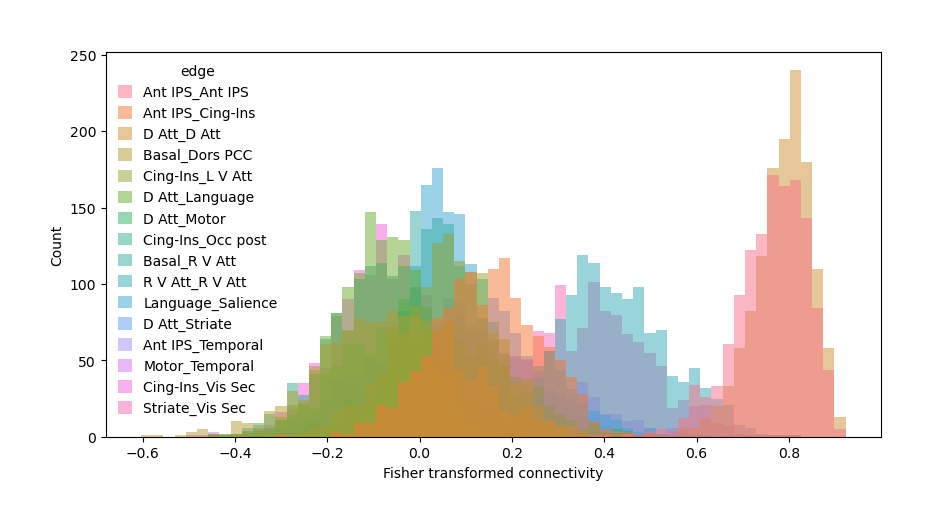

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(intra_region, x="Fisher transformed connectivity", hue="edge", ax=ax)
#ax.set_xlim(-1.96, 1.96)
plt.show()

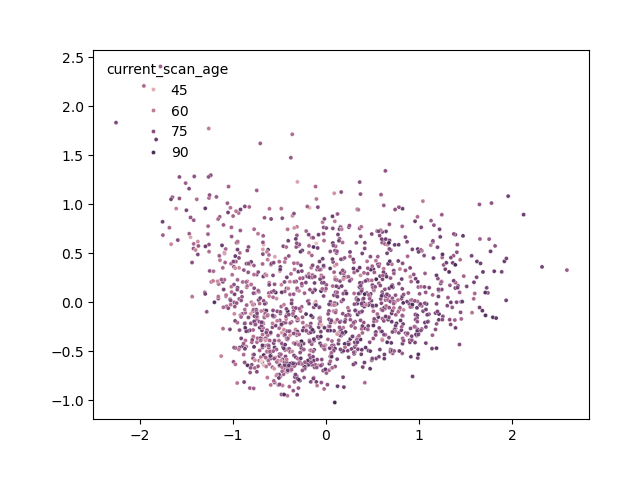

In [43]:
import seaborn as sns
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=df.current_scan_age)
plt.show()

In [17]:

set(df.columns) - set(edges)

{'3rd ventricle',
 '4th ventricle',
 'AD',
 'AGE_CONS',
 'APOE_eps4',
 'APOE_geno',
 'APOE_y',
 'CDRSCR',
 'CEN_ANOM',
 'DEMENCE_DAT',
 'INCCONSDAT_D',
 'M000',
 'M024',
 'M048',
 'MA',
 'MCI',
 'NIVETUD',
 'NUM_ID',
 'SEX',
 'brain-stem',
 'csf',
 'ctx-lh-bankssts',
 'ctx-lh-caudalanteriorcingulate',
 'ctx-lh-caudalmiddlefrontal',
 'ctx-lh-cuneus',
 'ctx-lh-entorhinal',
 'ctx-lh-frontalpole',
 'ctx-lh-fusiform',
 'ctx-lh-inferiorparietal',
 'ctx-lh-inferiortemporal',
 'ctx-lh-insula',
 'ctx-lh-isthmuscingulate',
 'ctx-lh-lateraloccipital',
 'ctx-lh-lateralorbitofrontal',
 'ctx-lh-lingual',
 'ctx-lh-medialorbitofrontal',
 'ctx-lh-middletemporal',
 'ctx-lh-paracentral',
 'ctx-lh-parahippocampal',
 'ctx-lh-parsopercularis',
 'ctx-lh-parsorbitalis',
 'ctx-lh-parstriangularis',
 'ctx-lh-pericalcarine',
 'ctx-lh-postcentral',
 'ctx-lh-posteriorcingulate',
 'ctx-lh-precentral',
 'ctx-lh-precuneus',
 'ctx-lh-rostralanteriorcingulate',
 'ctx-lh-rostralmiddlefrontal',
 'ctx-lh-superiorfrontal',